<a href="https://colab.research.google.com/github/filipecorreiabelfort/Trabalho-de-vis-o-Computacional_5_redes_trasnferlearning/blob/main/Trabalho_vis%C3%A3o_tranfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

X_content = np.load("/content/drive/MyDrive/NCA/ODIR-5K/X_odir_5k_N_D_G.npy") # array de imagens carregadas
Y = np.load("/content/drive/MyDrive/NCA/ODIR-5K/Y_odir_5k_N_D_G.npy")

print(len(X_content))
print(Y)

2107
[0 0 1 ... 1 0 1]


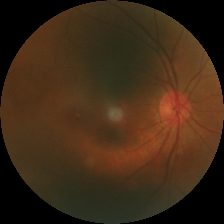

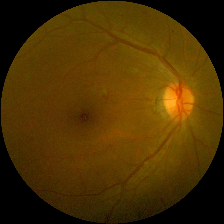

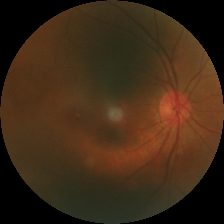

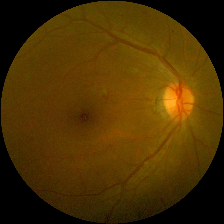

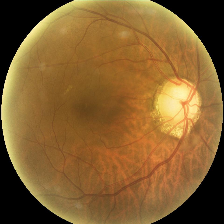

In [3]:

def extract_RG_channels(images):
    processed_images = []

    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        new_image = np.zeros_like(image)
        new_image[:,:,0] = image[:,:,0]  # Canal Vermelho (R)
        new_image[:,:,1] = image[:,:,1]  # Canal Verde (G)
        new_image[:,:,2] = image[:,:,0]  # Repetindo o Canal Vermelho para manter o formato RGB

        processed_images.append(new_image)

    return np.array(processed_images)


cv2_imshow(X_content[0])
cv2_imshow(X_content[2])

X = X_content


cv2_imshow(X[0])
cv2_imshow(X[2])
cv2_imshow(X[3])

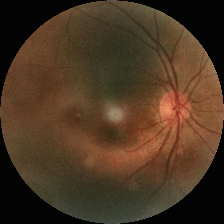

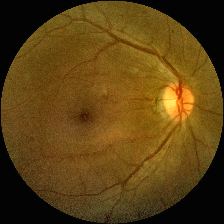

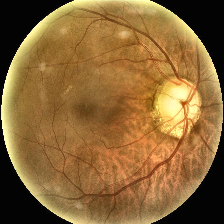

In [4]:


def apply_clahe(image):
    # Convertendo a imagem RGB para YUV
    yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

    # Separando os canais Y, U e V
    y, u, v = cv2.split(yuv_image)

    # Aplicando o CLAHE no canal Y (luminância)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_clahe = clahe.apply(y)

    # Juntando os canais YUV atualizados
    yuv_image_clahe = cv2.merge([y_clahe, u, v])

    # Convertendo de YUV de volta para RGB
    rgb_image_clahe = cv2.cvtColor(yuv_image_clahe, cv2.COLOR_YUV2RGB)
    return rgb_image_clahe


def bilateral_filter(image, d=5, sigma_color=75, sigma_space=75):

    # Aplicar o filtro bilateral
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)

    return filtered_image




X_preprocess = []
for i in range(len(X)):
  image = apply_clahe(X[i])
  X_preprocess.append(image)


cv2_imshow(X_preprocess[0])
cv2_imshow(X_preprocess[2])
cv2_imshow(X_preprocess[3])


In [5]:
import random
x_train, x_test, y_train, y_test = train_test_split(X_preprocess, Y, test_size=0.3, random_state=random.randint(1, 1000))


# Divisão do treino teste e validação
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.80, random_state=random.randint(1, 1000))


print(f"Train: {len(x_train)}")
print(f"test: {len(x_test)}")
print(f"val: {len(x_val)}")

print(f"Train: {len(y_train)}")
print(f"test: {len(y_test)}")
print(f"val: {len(y_val)}")


x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

y_val = np.array(y_val)
y_test = np.array(y_test)

"""for i in range(len(x_test)):
  cv2_imshow(x_test[i])
  print(y_test[i])"""


Train: 1474
test: 507
val: 126
Train: 1474
test: 507
val: 126


'for i in range(len(x_test)):\n  cv2_imshow(x_test[i])\n  print(y_test[i])'

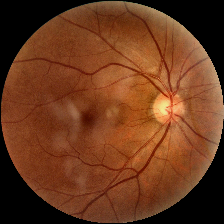

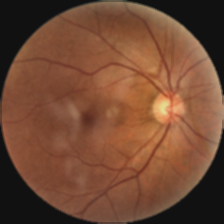

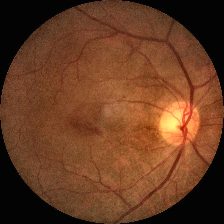

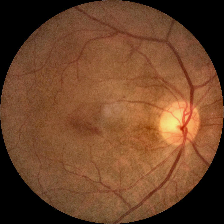

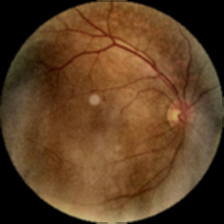

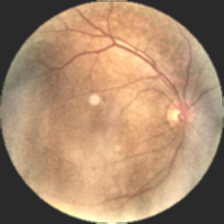

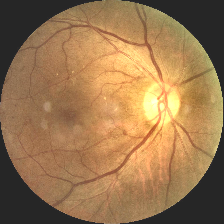

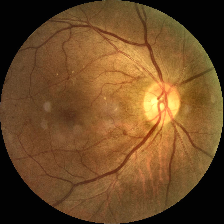

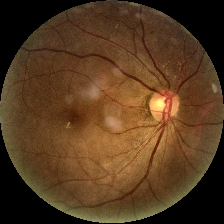

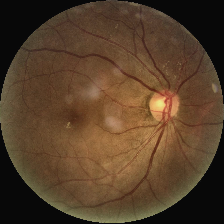

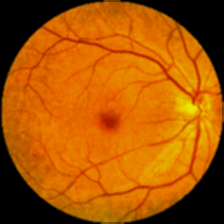

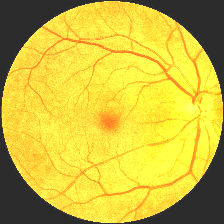

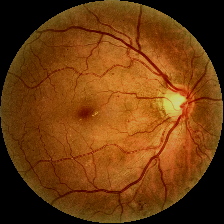

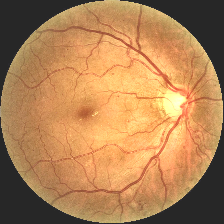

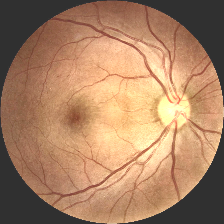

tamanho do treino: 2392
tamanho do treino: 2392
Old class valors:
962
454
58
new class valors:
962
908
522


In [7]:
#DATA AUGMENTATION
import random

import albumentations as A

guarda = []

def data_augmentation(image):

    augmentation = A.Compose([
        A.RandomBrightnessContrast(),
        A.RandomGamma(),
        A.Blur(blur_limit=1)
    ])

    augmented_image = augmentation(image=image)['image']
    guarda.append(augmented_image)

    return augmented_image


def data_aug_application(X, Y):
  data_aug = []
  y_aug = []
  for i in range(len(X)):
    if (Y[i] == 2):
      for j in range(8):
       imgd = data_augmentation(X[i])
       #cv2_imshow(X[i])
       #cv2_imshow(imgd)

       data_aug.append(imgd)
       y_aug.append(Y[i])

    if (Y[i] == 1):
      for j in range(2):
       imgd = data_augmentation(X[i])
       #cv2_imshow(X[i])
       #cv2_imshow(imgd)

       data_aug.append(imgd)
       y_aug.append(Y[i])

    else:
       data_aug.append(X[i])
       y_aug.append(Y[i])

  return data_aug, y_aug



newX, newY = data_aug_application(x_train, y_train)

guarda = np.array(guarda)

for i in range(15):
  cv2_imshow(guarda[i])

print(f"tamanho do treino: {len(newX)}")
print(f"tamanho do treino: {len(newY)}")

y_trains = y_train.tolist()
cont_0 = y_trains.count(0)
cont_1 = y_trains.count(1)
cont_2 = y_trains.count(2)

contn_0 = newY.count(0)
contn_1 = newY.count(1)
contn_2 = newY.count(2)

print("Old class valors:")
print(cont_0)
print(cont_1)
print(cont_2)

print("new class valors:")
print(contn_0)
print(contn_1)
print(contn_2)







In [8]:
#TESTANDO EM UM CLASSIFICADOR
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
newX = np.array(newX)
newY = np.array(newY)



# Exemplo de dados fictícios, substitua pelos seus próprios dados
# X = seus dados de entrada
# Y = suas classes correspondentes
"""
# Transformar X em 2D
new_shape = (newX.shape[0], -1)
newXKNN = newX.reshape(new_shape)

shape_test = (x_test.shape[0], -1)
x_testKnn = x_test.reshape(shape_test)


# Inicializar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
knn.fit(newXKNN, newY)

# Fazer previsões no conjunto de teste
Y_pred = knn.predict(x_testKnn)

# Calcular e plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

# Calcular o F1 Score para cada classe
f1_scores = f1_score(y_test, Y_pred, average=None)

# Plotar as métricas de avaliação para cada classe
classes = np.unique(y_test)
plt.figure(figsize=(10, 6))

for class_idx in classes:
    precision = conf_matrix[class_idx, class_idx] / sum(conf_matrix[:, class_idx])
    recall = conf_matrix[class_idx, class_idx] / sum(conf_matrix[class_idx, :])
    f1 = 2 * (precision * recall) / (precision + recall)

    plt.bar(class_idx - 0.2, precision, width=0.2, label=f'Precisão Classe {class_idx}')
    plt.bar(class_idx, recall, width=0.2, label=f'Recall Classe {class_idx}')
    plt.bar(class_idx + 0.2, f1, width=0.2, label=f'F1 Score Classe {class_idx}')

plt.xticks(classes)
plt.xlabel('Classe')
plt.title('Métricas de Avaliação por Classe')
plt.legend()
plt.show()"""

"\n# Transformar X em 2D\nnew_shape = (newX.shape[0], -1)\nnewXKNN = newX.reshape(new_shape)\n\nshape_test = (x_test.shape[0], -1)\nx_testKnn = x_test.reshape(shape_test)\n\n\n# Inicializar o classificador KNN\nknn = KNeighborsClassifier(n_neighbors=3)\n\n# Treinar o modelo\nknn.fit(newXKNN, newY)\n\n# Fazer previsões no conjunto de teste\nY_pred = knn.predict(x_testKnn)\n\n# Calcular e plotar a matriz de confusão\nconf_matrix = confusion_matrix(y_test, Y_pred)\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.title('Matriz de Confusão')\nplt.show()\n\n# Calcular o F1 Score para cada classe\nf1_scores = f1_score(y_test, Y_pred, average=None)\n\n# Plotar as métricas de avaliação para cada classe\nclasses = np.unique(y_test)\nplt.figure(figsize=(10, 6))\n\nfor class_idx in classes:\n    precision = conf_matrix[class_idx, class_idx] / sum(conf_matrix[:, class_idx])\n    recall = conf_mat

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

def buildModel(size, classes):
    baseModel = keras.applications.EfficientNetV2B2(include_top=False, weights="imagenet")
    baseModel.trainable = False

    for layer in baseModel.layers:
        if isinstance(layer, keras.layers.BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False

    preprocess = keras.applications.efficientnet_v2.preprocess_input  # Corrigindo o acesso ao preprocessamento

    inputs = keras.Input(shape=(size, size, 3))
    x = preprocess(inputs)  # Pré-processamento aplicado às entradas
    x = baseModel(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(classes, activation='softmax')(x)

    modelFinal = Model(inputs=inputs, outputs=outputs)
    return modelFinal, baseModel

#congela ou descongela camadas
def freeze(model_final, until):
  for layer in model_final.layers[:until]:
    layer.trainable = False
  for layer in model_final.layers[until:]:
    layer.trainable = True

model, baseModel = buildModel(224, 3)
model.summary()

35839040/35839040 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b2 (Functio  (None, None, None, 1408   8769374   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_2  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               180352    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                            

Epoch 1/5
75/75 [==============================] - 23s 126ms/step - loss: 3.9617 - accuracy: 0.3278 - val_loss: 1.2987 - val_accuracy: 0.3095
Epoch 2/5
75/75 [==============================] - 5s 72ms/step - loss: 3.9681 - accuracy: 0.3319 - val_loss: 1.2987 - val_accuracy: 0.3095
Epoch 3/5
75/75 [==============================] - 6s 77ms/step - loss: 3.9678 - accuracy: 0.3265 - val_loss: 1.2987 - val_accuracy: 0.3095
Epoch 4/5
75/75 [==============================] - 5s 72ms/step - loss: 3.9904 - accuracy: 0.3261 - val_loss: 1.2987 - val_accuracy: 0.3095
Epoch 5/5
75/75 [==============================] - 6s 74ms/step - loss: 4.0012 - accuracy: 0.3353 - val_loss: 1.2987 - val_accuracy: 0.3095
Epoch 1/25
75/75 [==============================] - ETA: 0s - loss: 1.6438 - accuracy: 0.5447
Epoch 1: val_loss improved from inf to 1.33563, saving model to /content/drive/MyDrive/NCA/EfficientNetV2B2_1,2,10.keras
75/75 [==============================] - 83s 370ms/step - loss: 1.6438 - accuracy: 

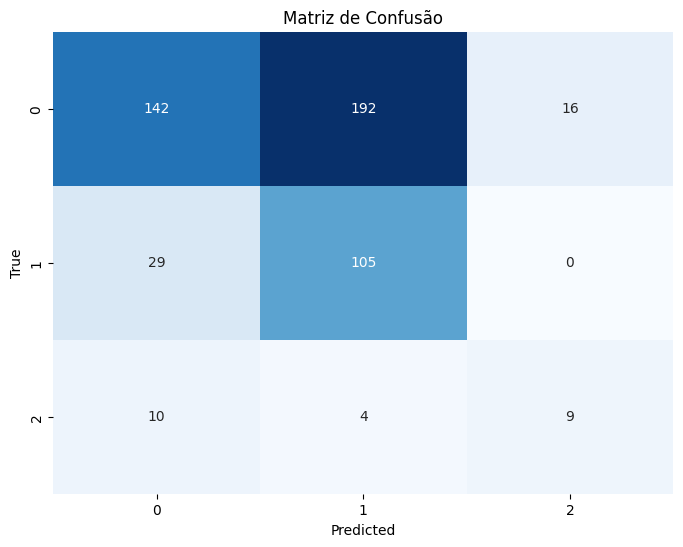

Matriz de Confusão:
[[142 192  16]
 [ 29 105   0]
 [ 10   4   9]]

F1 Score por Classe:
[0.53483992 0.48275862 0.375     ]

Precisão por Classe:
[0.78453039 0.34883721 0.36      ]

Recall por Classe:
[0.40571429 0.78358209 0.39130435]


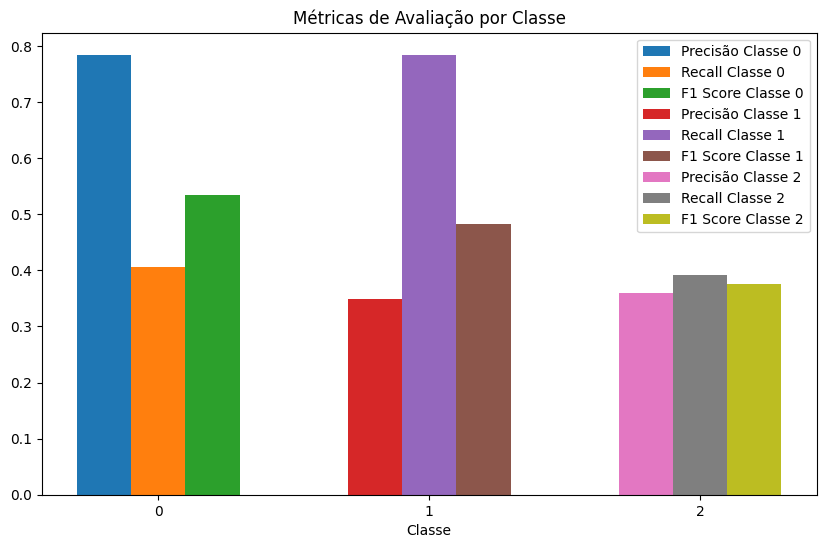

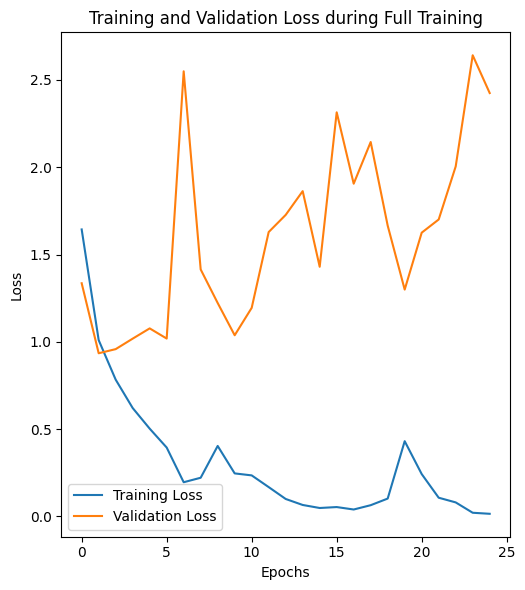

In [16]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
from keras.models import load_model




# Define o caminho para salvar o modelo
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/NCA/EfficientNetV2B2_1,2,10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

batch_size = 32
epochs = 25


freeze(model, len(model.layers))
baseModel.trainable = False


model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class_weights = {
    0: 1.0,  # Peso para a classe 0
    1: 2.0,  # Peso para a classe 1
    2: 10.0   # Peso para a classe 2
}


H_warmup = model.fit(
    newX,
    newY,
    batch_size=batch_size,
    epochs=5,  # Apenas algumas épocas para warm-up
    validation_data=(x_val, y_val),
    class_weight=class_weights,
)

# Descongela a rede base
freeze(model, 0)
# Substitua esta linha por um método para descongelar camadas baseModel
baseModel.trainable = True

# Configura o otimizador e compila o modelo para o treinamento completo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

H_full_train = model.fit(
    newX,
    newY,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint],
    class_weight=class_weights
    # Adiciona o callback para salvar o melhor modelo
)


model = load_model("/content/drive/MyDrive/NCA/EfficientNetV2B2_1,2,10.keras")
Y_pred = model.predict(x_test)
Y_pred = np.argmax(Y_pred, axis=1)

# Calcular e plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

# Calcular o F1 Score, Precisão e Recall para cada classe
f1_scores = f1_score(y_test, Y_pred, average=None)
precision_scores = precision_score(y_test, Y_pred, average=None)
recall_scores = recall_score(y_test, Y_pred, average=None)

# Imprimir a matriz de confusão e métricas
print("Matriz de Confusão:")
print(conf_matrix)
print("\nF1 Score por Classe:")
print(f1_scores)
print("\nPrecisão por Classe:")
print(precision_scores)
print("\nRecall por Classe:")
print(recall_scores)

# Plotar as métricas de avaliação para cada classe
classes = np.unique(y_test)
plt.figure(figsize=(10, 6))

for class_idx in classes:
    precision = precision_scores[class_idx]
    recall = recall_scores[class_idx]
    f1 = f1_scores[class_idx]

    plt.bar(class_idx - 0.2, precision, width=0.2, label=f'Precisão Classe {class_idx}')
    plt.bar(class_idx, recall, width=0.2, label=f'Recall Classe {class_idx}')
    plt.bar(class_idx + 0.2, f1, width=0.2, label=f'F1 Score Classe {class_idx}')

plt.xticks(classes)
plt.xlabel('Classe')
plt.title('Métricas de Avaliação por Classe')
plt.legend()
plt.show()

# Extrair as perdas do histórico de treinamento
loss_warmup = H_warmup.history['loss']
val_loss_warmup = H_warmup.history['val_loss']

loss_full_train = H_full_train.history['loss']
val_loss_full_train = H_full_train.history['val_loss']

# Plotar a perda durante o treinamento e validação
plt.figure(figsize=(10, 6))



# Loss durante o treinamento completo
plt.subplot(1, 2, 2)
plt.plot(loss_full_train, label='Training Loss')
plt.plot(val_loss_full_train, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss during Full Training')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score

import seaborn as sns
from livelossplot import PlotLossesKeras


n_runs = 1 #número de execuções, melhor que seja pelo menos 5
batch_size = 32
epochs = 20

newY = np.array(newY)

#acumuladores
recall = []
prec = []
f1 = []
matrizes = []

for i in range(n_runs):

  #pre-requisito
  model, baseModel = buildModel(X.shape[1], 3)

  #a) divide a base aleatoriamente
  #b) congela a rede base no primeiro tunning
  #c) treina para warm-up
  #d) faz o treino completo agora
  #e) treina para valer
  #f) predição


  freeze(model, 0)
  baseModel.trainable = False
  model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  #c) treina para warm-up
  H = model.fit(
      newX
      newY,
      batch_size= batch_size,
      epochs = 5, #só algumas épocas
      callbacks=[PlotLossesKeras(), #plotando gráficos
                tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
                tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NCA/ODIR-5K/modelo_efficientNetB1.h5', save_best_only=True, monitor='val_loss')
                ],
      validation_data = (x_val,y_val)
  )

  #d) faz o treino completo agora
  #se SFT: escolha camadas do topo para descongelar
  #se DFT: escolha until como 0

  #aqui DFT
  freeze(model, 0)
  baseModel.trainable = True

  #se SFT: pode tentar usar um otimizador mais suave, com taxa de apresendizado menor
  #caso FFT: veja onde a curva está, se estiver muito longe do objetivo usar o RMSProp
  model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  #e) treina para valer
  H = model.fit(
      newX,
      newY,
      batch_size= batch_size,
      epochs = epochs,
      callbacks=[PlotLossesKeras(), #plotando gráficos
                tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
                tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NCA/ODIR-5K/modelo_efficientNetB1.h5', save_best_only=True, monitor='val_loss')
                ],
      validation_data = (x_val,y_val)
  )


  #f) predição
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis = 1)
  y_true = np.argmax(y_test, axis = 1)

  #g) acumula resultados
  recall.append(recall_score(y_true, y_pred, average='weighted'))
  prec.append(precision_score(y_true, y_pred, average='weighted'))
  f1.append(f1_score(y_true, y_pred, average='weighted'))

  matrix = confusion_matrix(y_true, y_pred)
  matrizes.append(matrix)

#calculando as médias das execuções
recall_media = np.asarray(recall).mean(axis=0)
prec_media = np.asarray(prec).mean(axis=0)
f1_media = np.asarray(f1).mean(axis=0)

#calculando os desvios das execuções
recall_std = np.asarray(recall).std(axis=0)
prec_std = np.asarray(prec).std(axis=0)
f1_std = np.asarray(f1).std(axis=0)

#sns.heatmap(matrix, cmap='Blues', annot=True)

print ("Recall: " + str(recall_media) + " +- " + str(recall_std))
print ("Precisão: " + str(prec_media) + " +- " + str(prec_std))
print ("F1: " + str(f1_media) + " +- " + str(f1_std))



SyntaxError: ignored

3
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 7, 7, 1280)        6575239   
 )                                                               
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 512)               655872    
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 7232650 (27.59 MB)
Trainable params: 7170595 (27.35 MB)
Non-trainable params: 62055 (242.41 KB)
_________________________________________________________________
Epoch 1/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 84s 758ms/step - loss: 0.5023 - accuracy: 0.7939 - val_loss: 1.9895 - val_accuracy: 0.5952
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 0.2028 - accuracy: 0.9289
Epoch 2: val_accuracy did not improve from 0.59524
45/45 [==============================] - 31s 689ms/step - loss: 0.2028 - accuracy: 0.9289 - val_loss: 1.9661 - val_accuracy: 0.5873
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9467
Epoch 3: val_accuracy improved from 0.59524 to 0.61111, saving model to Efficient_model.h5
45/45 [==============================] - 32s 717ms/step - loss: 0.1461 - accuracy: 0.9467 - val_loss: 3.1675 - val_accuracy: 0.6111
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9609
Epoch 4: val_accuracy did not improve from 0.61111
45/45 [==============================] - 31s 697ms/step - loss: 0.1085 - accuracy: 0.9609 - val_loss: 2.2649 - val_accuracy: 0.50

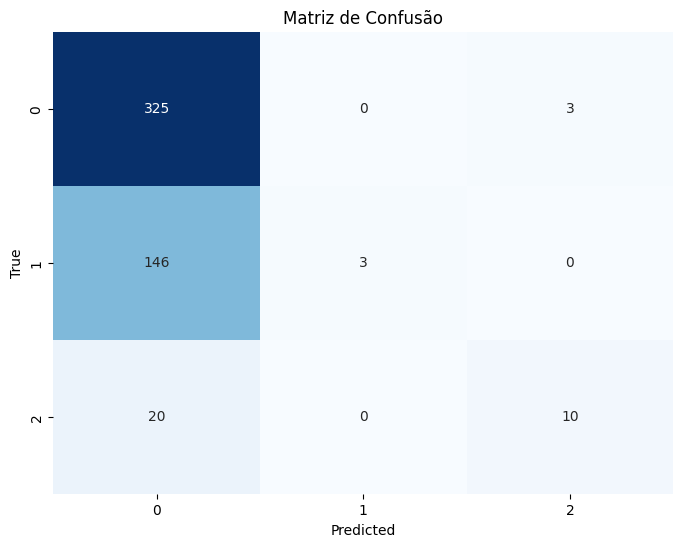

Matriz de Confusão:
[[325   0   3]
 [146   3   0]
 [ 20   0  10]]

F1 Score por Classe:
[0.79365079 0.03947368 0.46511628]

Precisão por Classe:
[0.66191446 1.         0.76923077]

Recall por Classe:
[0.99085366 0.02013423 0.33333333]


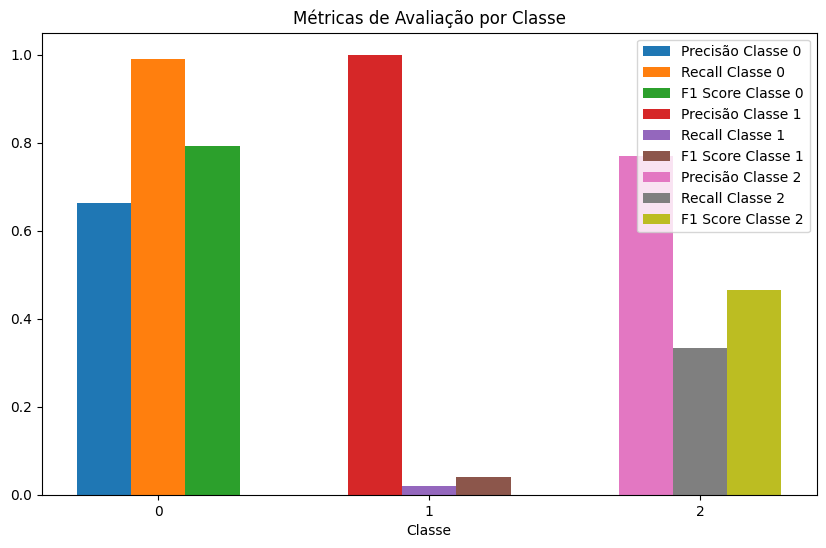

In [ ]:
import tensorflow as tf
from keras.applications import EfficientNetB1
from keras import layers, models
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, MaxPooling2D

input_shape = newX.shape[1:]  # Obtém o formato da entrada
num_classes = len(set(newY))  # Obtém o número de classes

newY = np.array(newY)
print(num_classes)

base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=input_shape)

base_model.trainable=False

checkpoint = ModelCheckpoint('Efficient_model.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)


model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
#model.add(layers.BatchNormalization())
#dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# congelar a maioria das camadas do modelo EfficientNet, permitindo que apenas as últimas 20 camadas sejam treináveis durante o processo de ajuste fino (fine-tuning)
for layer in model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Treinando o modelo
model.fit(newX, newY,
          epochs=20,
          validation_data=(x_val, y_val),
          batch_size=64,
          callbacks=[checkpoint])

# Avaliando o desempenho do modelo nos dados de teste
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Acurácia do modelo nos dados de teste: {accuracy}')

# Avaliando com model.predict
Y_pred = model.predict(x_test)

print(Y_pred)
Y_pred = np.argmax(Y_pred, axis=1)
print("\n")
print(Y_pred)

# Outras métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

# Calcular e plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

# Calcular o F1 Score, Precisão e Recall para cada classe
f1_scores = f1_score(y_test, Y_pred, average=None)
precision_scores = precision_score(y_test, Y_pred, average=None)
recall_scores = recall_score(y_test, Y_pred, average=None)

# Imprimir a matriz de confusão e métricas
print("Matriz de Confusão:")
print(conf_matrix)
print("\nF1 Score por Classe:")
print(f1_scores)
print("\nPrecisão por Classe:")
print(precision_scores)
print("\nRecall por Classe:")
print(recall_scores)

# Plotar as métricas de avaliação para cada classe
classes = np.unique(y_test)
plt.figure(figsize=(10, 6))

for class_idx in classes:
    precision = precision_scores[class_idx]
    recall = recall_scores[class_idx]
    f1 = f1_scores[class_idx]

    plt.bar(class_idx - 0.2, precision, width=0.2, label=f'Precisão Classe {class_idx}')
    plt.bar(class_idx, recall, width=0.2, label=f'Recall Classe {class_idx}')
    plt.bar(class_idx + 0.2, f1, width=0.2, label=f'F1 Score Classe {class_idx}')

plt.xticks(classes)
plt.xlabel('Classe')
plt.title('Métricas de Avaliação por Classe')
plt.legend()
plt.show()